## Классические методы обработки изображения

Позволяет улучшить изображения и поготовить к дальнейшему анализу
Все нижееизложенное основывается на работе с библитотекорй OpenCV

В данном ноутбуке ассамтривается ниже такие методы:
- Эквализация и нормализация изображения
- Цветовые палитры
- Бинаризация
- Фильтрация
- Морфологические операции
- Поиск контуов
- Наложение маски


## Установка и импорт библиотеки Open CV

In [ ]:
!pip install opencv-python #Установка Open CV, если нехватает то и отальные библиотеки аналогично

In [1]:
import cv2
print(cv2.__version__)

4.10.0


In [3]:
#Дополнительные библиотеки
import numpy as np
import os
from matplotlib import pyplot as plt

In [4]:
#Функция для вывода изображения в ноуттбук
from PIL import Image
def show_image(image):
    pil_img = Image.fromarray(image)
    return pil_img

## Загрузка изображения

In [6]:
#Загрузка из файла
#img = cv2.imread('')  # Мтожем просто загрузить изображение с компьтера, указав путь к изображению

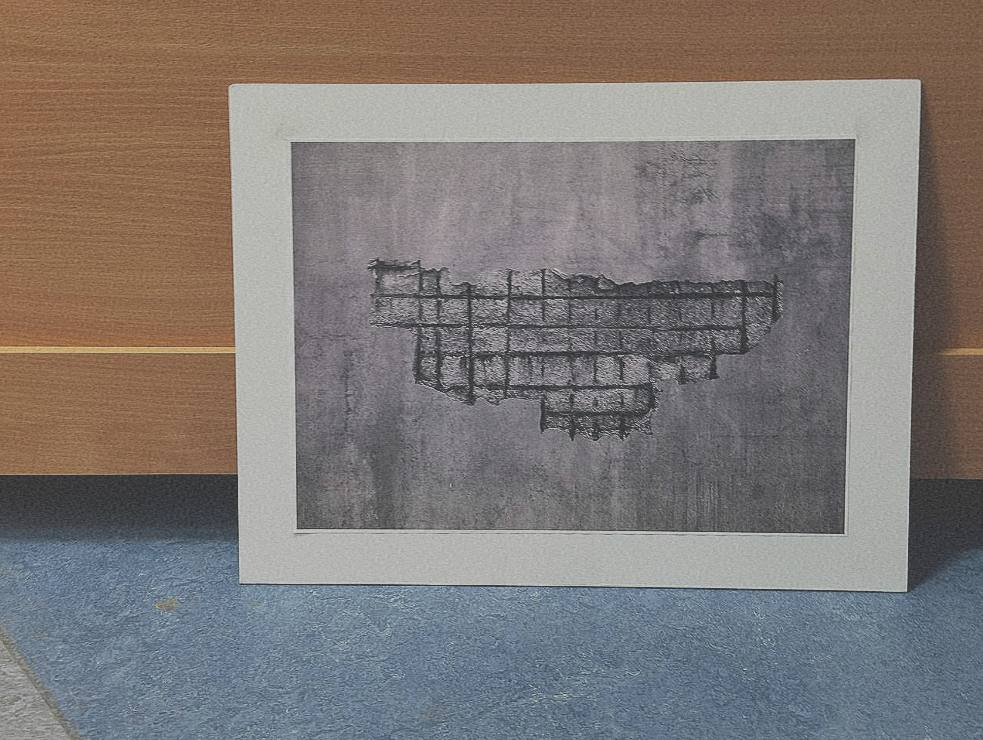

In [45]:
import requests       #Для скачивания по ссылке
url = 'https://github.com/efgenj/Computer-Vision/blob/main/dataset_foto_hardaton/real_foto1_def.jpg?raw=true'

resp = requests.get(url, stream=True).raw
img = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Перевод в RGB 

show_image(img_rgb)

Нчнем не много не с самого простого)

## Эквализщация и Нормализация изображения
Эквализация и нормализация гистограммы используются для выравнива-ния яркости изображения, чтобы компенсировать изменения освещения. Рас-смотрим изображение, значения пикселей которого ограничены только некото-рым определенным диапазоном значений. Например, на более ярком изображе-нии все пиксели будут ограничены высокими значениями. Но хорошее изобра-жение будет содержать пиксели из всех областей изображения. Итак, вам нужно растянуть эту гистограмму до обоих концов. Эквализация гистограммы пере-распределяет уровни яркости таким образом, чтобы максимизировать динами-ческий диапазон изображения, делая темные участки светлее, а светлые — тем-нее. Нормализация, приводит яркость всего изображения к одному уровню, устраняя различия в освещенности разных участков.

https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

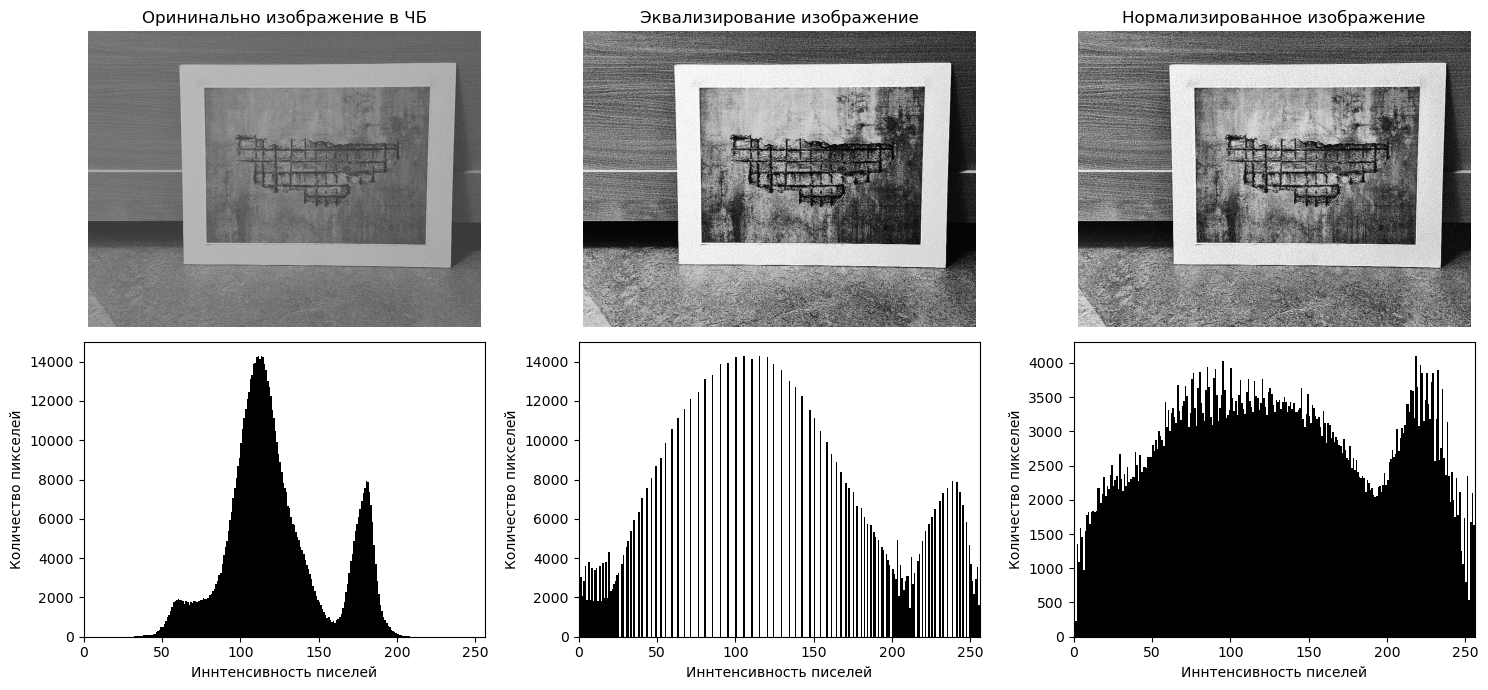

In [10]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Применение эквализации гистограммы
equalized_img = cv2.equalizeHist(gray_img)

# Создание объекта CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# Применение нормализации гистограммы
normalized_img = clahe.apply(equalized_img)


# Подготовка списка изображений и названий
images = [gray_img, equalized_img, normalized_img]
titles = ['Орининально изображение в ЧБ', 'Эквализирование изображение', 'Нормализированное изображение']

# Настройка subplot'ов
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))

# Верхний ряд: изображения
for i in range(len(images)):
    axes[0][i].imshow(images[i], cmap='gray', vmin=0, vmax=255)
    axes[0][i].set_title(titles[i])
    axes[0][i].axis('off')

# Нижний ряд: гистограммы
for i in range(len(images)):
    axes[1][i].hist(images[i].ravel(), bins=256, range=[0, 256], color='black')
    axes[1][i].set_xlim([0, 256])
    axes[1][i].set_ylabel('Количество пикселей')
    axes[1][i].set_xlabel('Иннтенсивность писелей')

plt.tight_layout()
plt.show()

## Цветовые плитры
Традиционно сложилость, так что в OpenCV Изображения представденны в палитре BGR(Blue,Green,Red), поэтому для удобства восприятия необходимо переводить иззображение в привычный формат RGB.
Таже существуют удобные форматф представдения изображений которые часто используют в компьтерном зрении, основные это
- Чернобелое изображение (отенки серого)
- Изобраджени в палитьре HSV
- Изобраджени в палитьре LAB
- Бинарноре изображение 

  Черно-белое изображение приводит к удалению цветовой информации и сохранению только значений яркости. Преимущество черно-белого изображения со-стоит в том, что оно упрощает дальнейший анализ, поскольку уменьшает раз-мер данных и устраняет влияние цвета.

Ппространство HSV (Hue, Saturation, Value) позволяет разделить компоненты цвета на три составляющие  оттенок (H), насыщенность (S) и значение (V)
 Преобразование в HSV полезно, чем что это облегчает рабо-ту с компонентами цвета, такими как оттенка, насыщенности, изменение пара-метра яркости V, соответствует изображению в чёрно-белом формате. Основное преимущество - удобство работы с отдельными компонентами цвета в отличие от RG

Под аббревиатурой LAB обычно понимается цветовое пространство CIE L*a*b*, которое на данный момент является международным стандартом.

В системе CIE L*a*b координата L означает светлоту (в диапазоне от 0 до 100), а координаты a,b – означают позицию между зелёным-пурпурным, и синим-жёлтым цвета. Честно сказать особо не понимаю зачем оно нужно.

Бинарноре изображение удобно тем что оставляет в изобраджение тольео те пиксели что проходят определенный порог, этот порого тоже может быть разным, но об этом чуть позже.

Всен преобразования представленны в https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.htmlиР


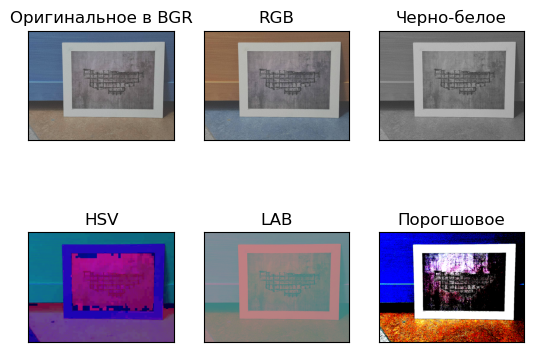

In [15]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
_,binary_image = cv2.threshold(img,130,255,cv2.THRESH_BINARY)#бинаризация


titles = ['Оригинальное в BGR', 'RGB', 'Черно-белое', 'HSV','LAB', 'Порогшовое']
threshold_images = [img, rgb, gray, hsv, lab, binary_image]

for i in range(6):
   plt.subplot(2,3,i+1),plt.imshow(threshold_images[i],'gray',vmin=0,vmax=255)
   plt.title(titles[i])
   plt.xticks([]),plt.yticks([])

plt.show()
#show_image(binary_image)

**Палитра HSV**

Простейший способ отобразить HSV в трёхмерное пространство — воспользоваться цилиндрической системой координат. Здесь координата H определяется полярным углом, S — радиус-вектором, а V — Z-координатой. То есть, оттенок изменяется при движении вдоль окружности цилиндра, насыщенность — вдоль радиуса, а яркость — вдоль высоты. Несмотря на «математическую» точность, у такой модели есть существенный недостаток: на практике количество различимых глазом уровней насыщенности и оттенков уменьшается при приближении яркости (V) к нулю (то есть, на оттенках, близких к чёрному). Также на малых S и V появляются существенные ошибки округления при переводе RGB в HSV и наоборот. 
с


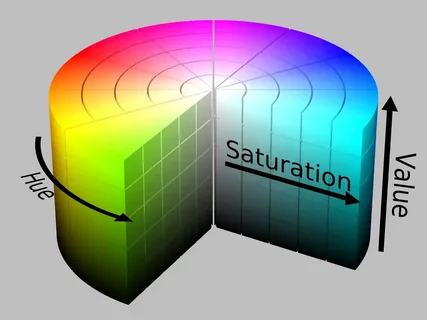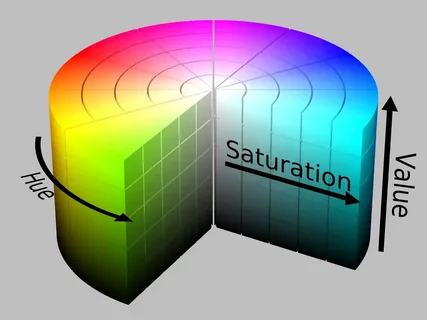


В следующем блоке предствленно наложение маски, на видеопоток с веб камеры при помощи цветовой палитры HSV.
В открывшемся окне есть возможность ручного выставления пороговых значений для каждого из параметров цветовой палитры что позволяет наглядно показать влияние каждого параметра и как при поможи них можно выделять интересующие параметры.



In [18]:
def nothing (x):
    pass
    
cap = cv2.VideoCapture(0)
cv2.namedWindow("frame")
cv2.createTrackbar ("HL", "frame", 0,180, nothing) 
cv2.createTrackbar ("SL", "frame", 0,255, nothing) 
cv2.createTrackbar ("VL", "frame", 0,255, nothing)
cv2.createTrackbar ("H", "frame", 0,180, nothing) 
cv2.createTrackbar ("S", "frame", 0,255, nothing)
cv2.createTrackbar ("V", "frame", 0,255, nothing)

while True:
    ret, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    hl= cv2.getTrackbarPos("HL", "frame")
    sl= cv2.getTrackbarPos("SL", "frame")
    vl=cv2.getTrackbarPos("VL", "frame")
    h=cv2.getTrackbarPos("H","frame")
    s=cv2.getTrackbarPos("S","frame")
    v=cv2.getTrackbarPos("V", "frame")
    
    lower = np.array([hl,sl,vl])
    upper = np.array([h,s,v])
    
    mask = cv2.inRange(hsv, lower, upper)
    
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    #res = cv2.rotate(res, cv2.ROTATE_180)
    #height, width = res.shape[:2]
    #res = cv2.resize(res, (height*2, width*2), interpolation = cv2.INTER_CUBIC)
    
    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow('res', res)
    
    k =cv2.waitKey(1) & 0xFF  #(Для закрытия окон нажать Esc)
    if k== 27:
        break
cv2.destroyAllWindows()

**Бинаризация**

Простое определение порога
Здесь все предельно просто. Для каждого пикселя применяется одно и то же пороговое значение. Если значение пикселя меньше или равно пороговому значению, оно устанавливается равным 0, в противном случае устанавливается максимальное значение. Функция cv.threshold используется для применения порогового значения. Первый аргумент - это исходное изображение, которое должно быть изображением в оттенках серого. Второй аргумент - это пороговое значение, которое используется для классификации значений пикселей. Третий аргумент - это максимальное значение, которое присваивается значениям пикселей, превышающим пороговое значение. OpenCV предоставляет различные типы порогового значения, которое задается четвертым параметром функции. Базовое пороговое значение, как описано выше, выполняется с использованием типа cv.THRESH_BINARY. Все простые типы порогового значения являются:

Адаптивное определение порога

Если на изображении разные условия освещения в разных областях то в этом случае может помочь адаптивное определение порога. Здесь алгоритм определяет порог для пикселя на основе небольшой области вокруг него. Таким образом, мы получаем разные пороговые значения для разных областей одного и того же изображения, что дает лучшие результаты для изображений с разной освещенностью.

cv.ADAPTIVE_THRESH_MEAN_C: Пороговое значение представляет собой среднее значение площади окрестности минус константа C. 
cv.ADAPTIVE_THRESH_GAUSSIAN_C: Пороговое значение представляет собой взвешенную по гауссу сумму значений окрестности минус константа C.
Размер блока определяет размер области соседства, а C является константой, которая вычитается из среднего значения или взвешенной суммы пикселей соседства.

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

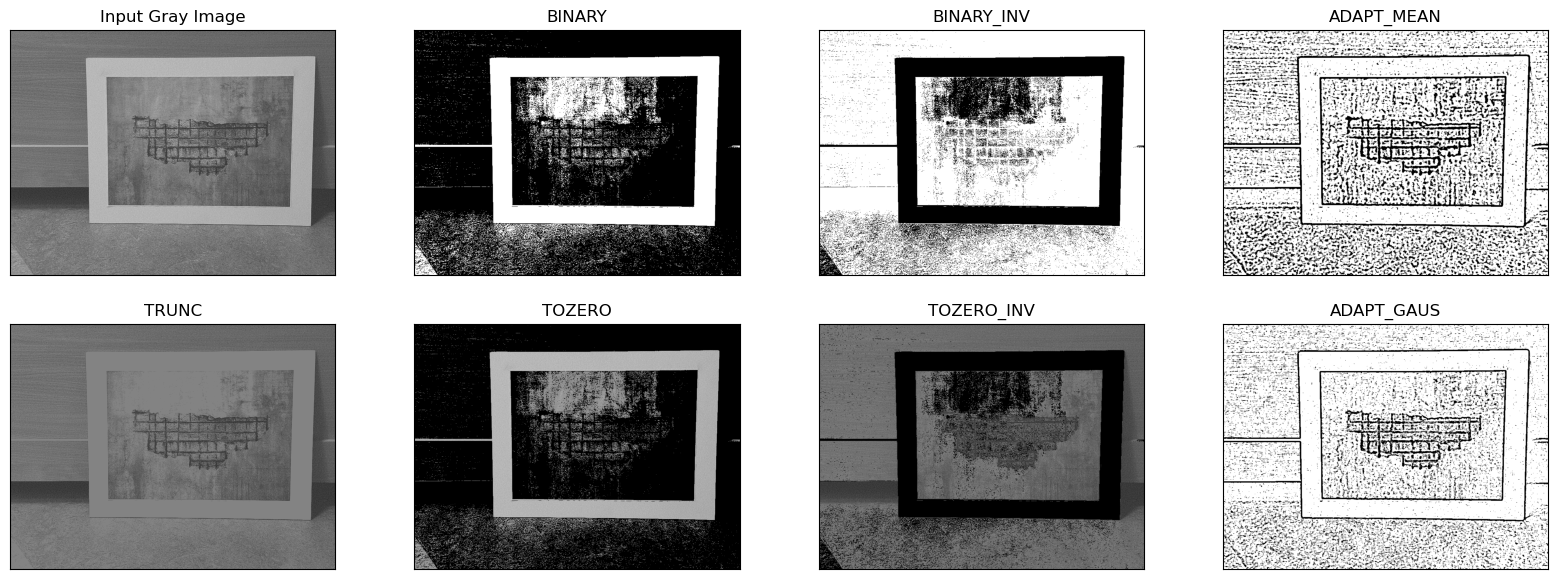

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #normalized_img
ret,thresh_image1 = cv2.threshold(gray,132,255,cv2.THRESH_BINARY)
ret,thresh_image2 = cv2.threshold(gray,132,255,cv2.THRESH_BINARY_INV)
ret,thresh_image3 = cv2.threshold(gray,132,255,cv2.THRESH_TRUNC)
ret,thresh_image4 = cv2.threshold(gray,132,255,cv2.THRESH_TOZERO)
ret,thresh_image5 = cv2.threshold(gray,132,255,cv2.THRESH_TOZERO_INV)


imgg = cv2.medianBlur(gray,7)
th_adapt_mean = cv2.adaptiveThreshold(imgg,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th_adapt_gaus = cv2.adaptiveThreshold(imgg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)


titles = ['Input Gray Image', 'BINARY', 'BINARY_INV','ADAPT_MEAN', 'TRUNC', 'TOZERO', 'TOZERO_INV','ADAPT_GAUS']
threshold_images = [gray, thresh_image1, thresh_image2, th_adapt_mean, thresh_image3, thresh_image4, thresh_image5, th_adapt_gaus]

fig, axs = plt.subplots(2, 4, figsize=(20, 7))

for i in range(8):
    axs[int(i/4), i%4].imshow(threshold_images[i], 'gray', vmin=0, vmax=255)
    axs[int(i/4), i%4].set_title(titles[i])
    axs[int(i/4), i%4].set_xticks([]), axs[int(i/4), i%4].set_yticks([])

plt.show()

In [188]:
#show_image(th_adapt_gaus)

## Сглаживание и устранение шумов.

Как и в случае с одномерными сигналами, изображения также можно обрабатывать с помощью различных фильтров, таких как фильтры нижних частот (LPF), фильтры верхних частот (HPF) и других. Фильтры LPF предназначены для устранения шума и размытости в изображениях, в то время как HPF помогают обнаруживать границы на картинках.
OpenCV предлагает функцию cv.filter2D(), которая позволяет свертывать ядро с изображением. В качестве примера мы рассмотрим применение усредняющего фильтра к изображению. Ядро усредняющего фильтра размером 5x5 выглядиткак, матрица заполненая единицами, и для нормализации домнажают на 1/25.:
Операция происходит следующим образом: удерживая ядро над пикселем, мы добавляем все 25 пикселей под ним, затем берем среднее значение и заменяем центральный пиксель новым средним. Эта операция продолжается для каждого пикселя на изображении. Попробуйте запустить этот код и оценить результат.

https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

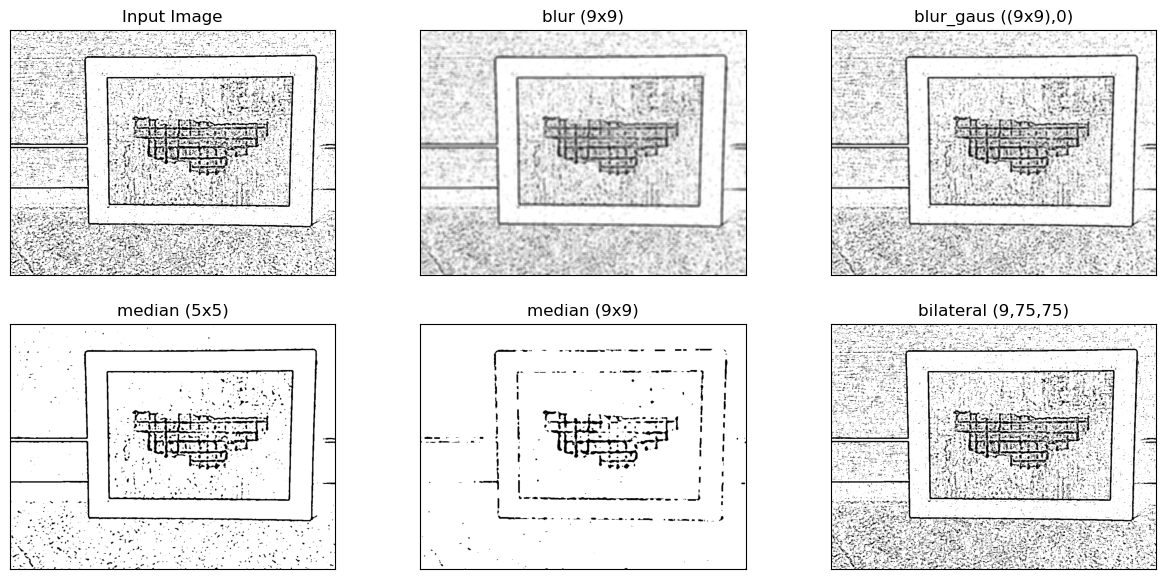

In [26]:
im_bluderd=th_adapt_gaus
blur = cv2.blur(im_bluderd,(9,9))
blur_gaus = cv2.GaussianBlur(im_bluderd,(9,9),0)
median = cv2.medianBlur(im_bluderd,5)
median99 = cv2.medianBlur(im_bluderd,9)
blur_bilateral = cv2.bilateralFilter(im_bluderd,9,75,75)


titles = ['Input Image', 'blur (9x9)', 'blur_gaus ((9x9),0)','median (5x5)','median (9x9)', 'bilateral (9,75,75)']
blur_images = [ im_bluderd, blur, blur_gaus, median, median99, blur_bilateral]


fig, axs = plt.subplots(2, 3, figsize=(15, 7))


for i in range(6):
    axs[int(i/3), i%3].imshow(blur_images[i], 'gray', vmin=0, vmax=255)
    axs[int(i/3), i%3].set_title(titles[i])
    axs[int(i/3), i%3].set_xticks([]), axs[int(i/3), i%3].set_yticks([])

plt.show()

## Морфологические операции
 Морфологические операции используются для анализа и обработки форм объектов на изображении. Эти операции выполняются с использованием струк-турирующего элемента, который перемещается по всему изображению и срав-нивается с каждым пикселем. В зависимости от типа операции, результат может изменять форму объектов, удалять шумы или заполнять пробелы.

Основные виды морфологических операций- :
Эрозия (Erosion): Удаляет пиксели с краёв объектов, уменьшая их разме-ры. Эта операция полезна для удаления небольших объектов или снижения уровня шу
- а.
Дилатация (Dilation): Добавляет пиксели к краям объектов, увеличивая их размеры. Используется для заполнения пробелов внутри объектов или соедине-ния близко расположенных об
-  ов.
Открытие (Opening): Последовательное выполнение эрозии, а затем дила-тации. Применяется для удаления мелких объектов и сохранения кру
- ных.
Закрытие (Closing): Последовательное выполнение дилатации, а затем эрозии. Используется для заполнения небольших пробелов и сохранения формы объ
- ктов.
Топ-Хэт (Top-Hat): Операция, которая выделяет мелкие детали на изобра-жении, удаляя фон. Это достигается путем вычитания исходного изображения из результата от
- рытия.
Блэк-Хэт (Black-Hat): Обратная операция Топ-Хэта, которая выделяет крупные детали на изображении, оставляя фон. Выполняется путем вычитания закрытия из исходного изобр
Изменяя последовательность, количество итераций, ядро свертки можно получать совершенно разные результаты.ажения.


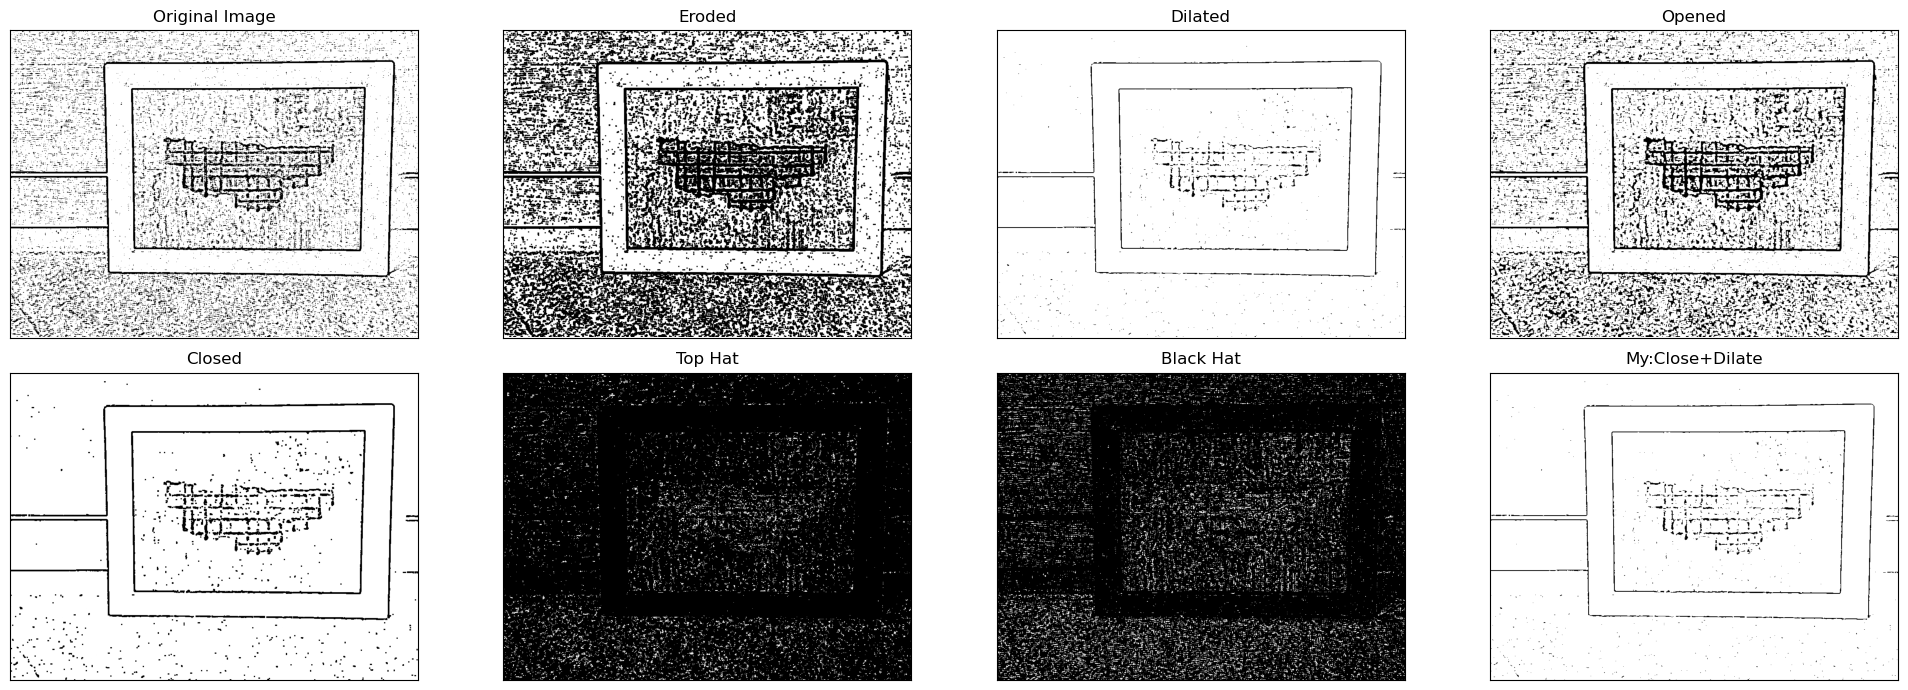

In [29]:
img_morf=blur_bilateral#median

# Структурный элемент для морфологических операций
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Прямоугольный элемент

# Эрозия
eroded = cv2.erode(img_morf, kernel, iterations=1)

# Дилатация
dilated = cv2.dilate(img_morf, kernel, iterations=1)

# Открытие
opened = cv2.morphologyEx(img_morf, cv2.MORPH_OPEN, kernel)

# Закрытие
closed = cv2.morphologyEx(img_morf, cv2.MORPH_CLOSE, kernel)

# Топ-хэт
top_hat = cv2.morphologyEx(img_morf, cv2.MORPH_TOPHAT, kernel)

# Блэк-хэт
black_hat = cv2.morphologyEx(img_morf, cv2.MORPH_BLACKHAT, kernel)

# my
kernel_my = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0]
], dtype=np.uint8)


my_morf = cv2.morphologyEx(img_morf, cv2.MORPH_CLOSE, kernel)
my_morf = cv2.dilate(my_morf, kernel, iterations=1)

#my_morf = cv2.morphologyEx(my_morf, cv2.MORPH_CLOSE, kernel)



# Создание списка изображений и подписей
images = [img_morf, eroded, dilated, opened, closed, top_hat, black_hat, my_morf]
titles = ['Original Image', 'Eroded', 'Dilated', 'Opened', 'Closed', 'Top Hat', 'Black Hat', 'My:Close+Dilate']

# Визуализация результатов
fig, axs = plt.subplots(2, 4, figsize=(20, 7))

for i in range(8):
    row = i // 4
    col = i % 4
    axs[row, col].imshow(images[i], cmap='gray')
    axs[row, col].set_title(titles[i])
    axs[row, col].set_xticks([]), axs[row, col].set_yticks([])

plt.tight_layout()
plt.show()

## Поиск контуров и границ на изображении
Существует несколько основных методов для поиска контуров на изображениях. Чаще всего применяют метод поиска границ Кенни и опрератор Собеля(также есть схожие методв). Метод Кнни более точный но менее медленны по сравнению с методом Собеля.
произведем поиск кнтурров на исходном изображении и на изображении после билатеральной фильтрации.


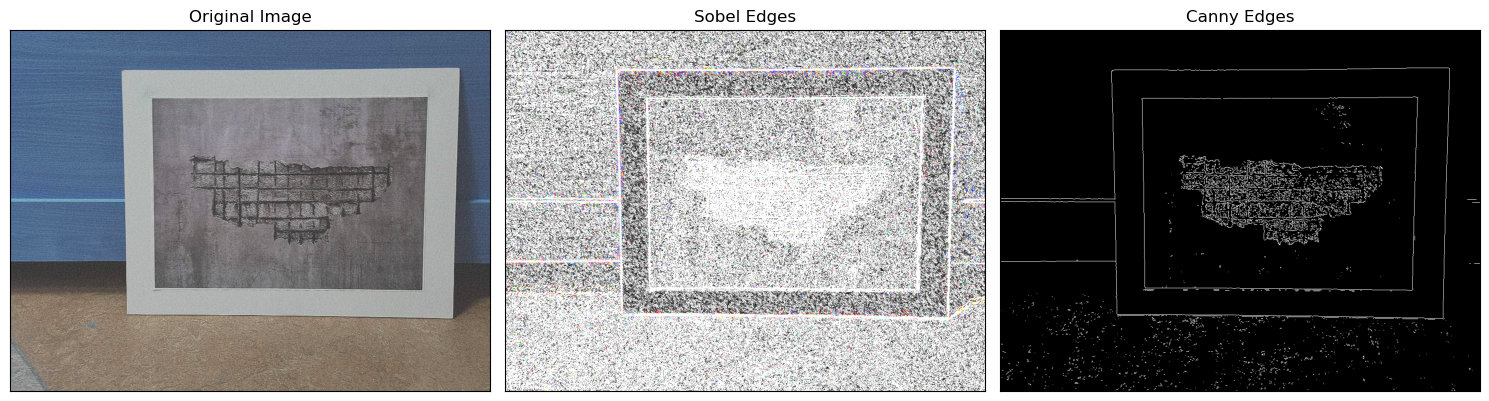

In [32]:
img_grany=img #my_morf
# Применение метода Собеля
sobel_x = cv2.Sobel(img_grany, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img_grany, cv2.CV_64F, 0, 1, ksize=5)
sobel_abs = cv2.convertScaleAbs(sobel_x + sobel_y)

# Применение метода Canny
canny_edges = cv2.Canny(img_grany, 220,255 )

# Создание списка изображений и подписей
images = [img_grany, sobel_abs, canny_edges]
titles = ['Original Image', 'Sobel Edges', 'Canny Edges']

# Визуализация результатов
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

for i in range(3):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(titles[i])
    axs[i].set_xticks([]), axs[i].set_yticks([])

plt.tight_layout()
plt.show()

In [34]:
#show_image()

## Применение маски

Применеие маски позволяет точно сосредоточиться на исследуемом обьекте, и позволяет не обращать внимания на остальное, часто маски это бинарное изображение которая оставляет тольк, интересные зоны.
Примером маски можес служить что угодно, выделим основные признаки ндля наложения маски:
- по цвету, если известно что наш обьект красного цвета, то есть смысл оставить только пиксели красного цвета, удобно применить для этого отсечение по пороговому значению в параметре H тона в цветовой палитре HSV,  чем больше доапазон тем больше будеит и сама маса.
- по форме, если известено форма обьетиа на котором необходимто чтото искать то можно применять маску соответствующей формы. напрмер взлетно посадочной полосы.
- по статическому фону, если камера установлена на дорого по которой едут машины, выгодно сравнить с фоном дорого, оставляя в расмотрении только движущийся обьект

  Рассмотрим применение некоторых масок, в данной дадаче удобно применить маску по цвету, для оставления только чсерных и серых пикселей, отсекая все цаветные. также можно применить маску по форме, прямоугольника что бы сосредоточиться только на деффекте. (в данной задаче деффект искуственный, и форма рамки прямоугольная, но если необходимо обнаруживать деффект на деталях для диагностики например у самолета или поезда на предмет деффектов и неисправностей то данный способ отлично подходить так как форма деталей, скорее всего сложеннее, но известна).
  В данном случае проведем поиск контуров, найдем наиболее похожий на прямоугольник, апроксимируем и получаем маску.

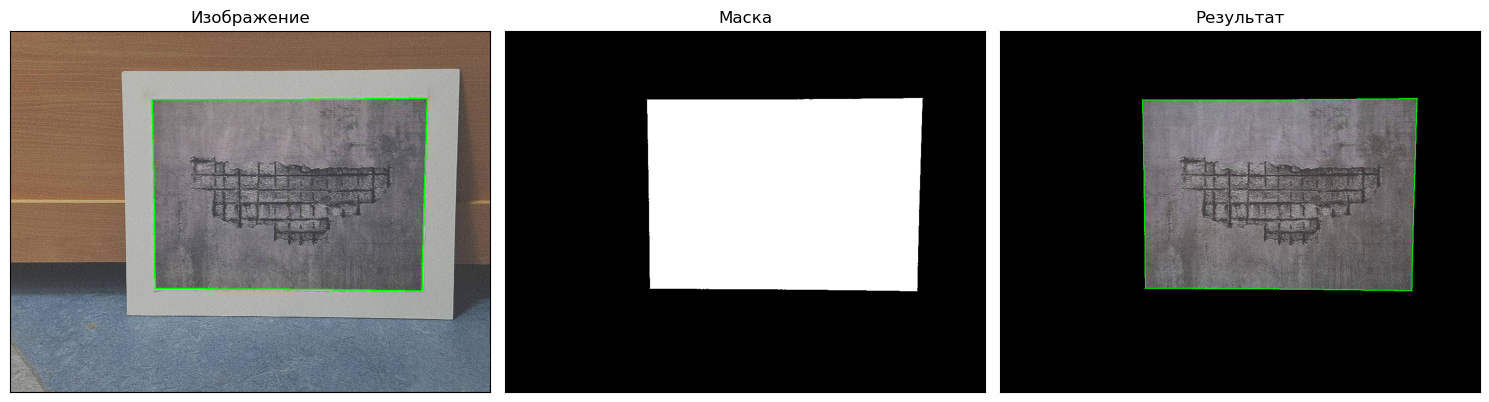

In [111]:
#МСКА ПО ФОРМЕ ЧЕТЫРЕХУГОЛЬНИКА

#img
# Определение минимального допустимого размера прямоугольника
width = int(img.shape[1])
height = int(img.shape[0])

min_area = int(width * height * 0.01)

# Преобразование кадра в оттенки серого
frame=img
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Применение адаптивного порога для отделения белых и черных областей
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Поиск всех контуров на изображении
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

defects_found = False

for cnt in contours:
    # Приблизим контур многоугольником
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)
    
    if len(approx) == 4:
        area = cv2.contourArea(cnt)
        
        
        # Проверка на минимальный размер прямоугольника
        if area >= min_area:
            #print('нашел прямоугольник')
            cv2.drawContours(frame, [cnt], 0, (0, 255, 0), 2)
            x, y, w, h = cv2.boundingRect(cnt)
            # Создание маски для текущего контура
            mask = np.zeros_like(gray)
            cv2.drawContours(mask, [cnt], 0, 255, -1)
            
            # Вырезаем область прямоугольника из оригинального изображения
            roi = cv2.bitwise_and(img, frame, mask=mask)
            roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            frame= cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)



# Создание списка изображений и подписей
images = [ frame, mask, roi]
titles = ['Изображение', 'Маска', 'Результат']

# Визуализация результатов
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

for i in range(3):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(titles[i])
    axs[i].set_xticks([]), axs[i].set_yticks([])

plt.tight_layout()
plt.show()

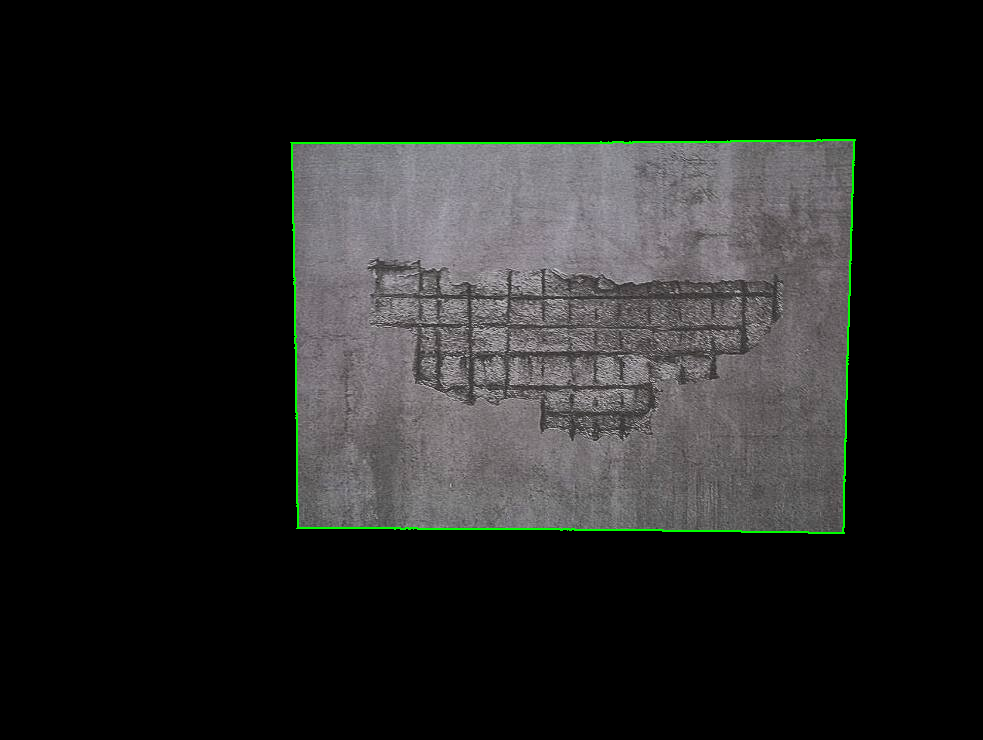

In [113]:
show_image(roi)

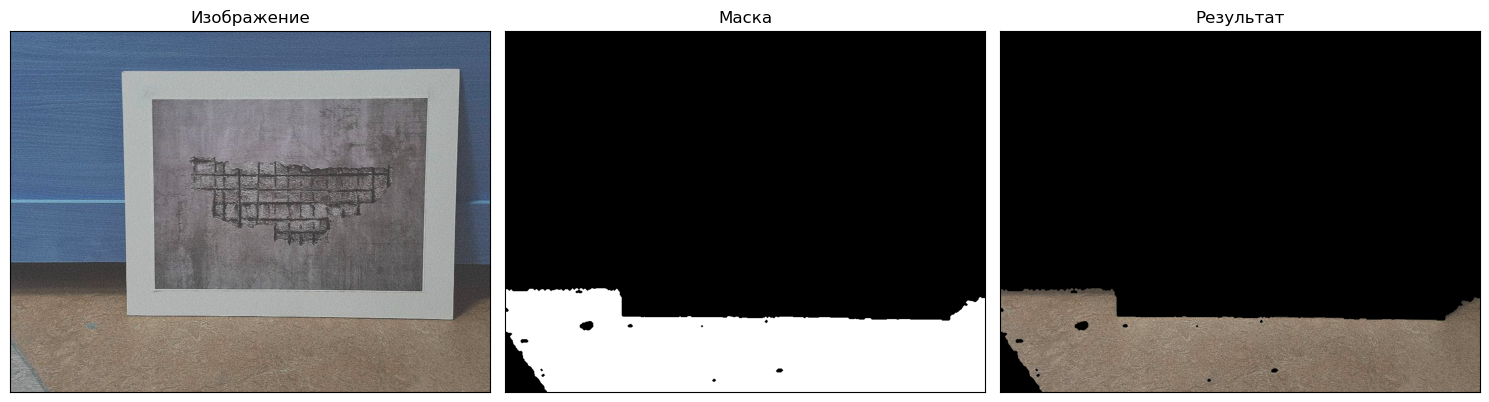

In [47]:
frame=img

# Преобразуем изображение в HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Применяем пороговую обработку для выделения красных оттенков
lower_col = np.array([100, 40, 20])
upper_col = np.array([190, 255, 255])

# Создаем маску для красных оттенков
mask = cv2.inRange(hsv, lower_col, upper_col)

#Морфология
mask = cv2.erode(mask, kernel, iterations=2)
mask = cv2.dilate(mask, kernel_my, iterations=1)
#mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel_my)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel_my)

# Накладка маски на исходное изображение
#result = cv2.bitwise_and(img,  mask=mask)
roi = cv2.bitwise_and(img, frame, mask=mask)
#roi_rgb  = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)


# Создание списка изображений и подписей
images = [ frame, mask, roi]
titles = ['Изображение', 'Маска', 'Результат']

# Визуализация результатов
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

for i in range(3):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(titles[i])
    axs[i].set_xticks([]), axs[i].set_yticks([])

plt.tight_layout()
plt.show()

In [733]:
#show_image(mask)

Были рассмотренны основные подходы для классического машиннгого зрения которые часто используют для предварительной подготовки изображений. Идеи этих методов используются и в современных алгоритмах, напимер сверточные нейросети применяют ядра свертски что по факту является фильтрацией рассмотренной ранее, применение различных изменений изображения также очень полезно для обучения нейронной сети, при обучении набор данных можно очень сильно расширть за счет применения различных масок, фильтров, поворотов изображения, это все способствует лучшему обучению сети и позволяет распозновать обьекты в различных условиях. применение классических методорв обучения менее гибкое чем обученные нейронные сети.